In [79]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.manifold
import sklearn.datasets
import glob
import sklearn.cluster


# t-SNE

t-SNE es la abreviación de t-distributed Stochastic Neighbor Embedding.

t-SNE reduce la dimensionalidad de un conjunto de datos.
Convierte puntos cercanos (en el sentido Euclidiano) en altas dimensiones
en puntos cercanos en dos dimensiones.

El algoritmo es estocástico, así que diferentes inicializaciones van a dar diferentes resultados.

Un buen lugar para empezar a aprender sobre los detalles es la página de uno de los
creadores del algoritmo: https://lvdmaaten.github.io/tsne/

In [81]:
numeros = sklearn.datasets.load_digits()
imagenes = numeros['images']
n_imagenes = len(target)
print(np.shape(imagenes), n_imagenes) # Hay 1797 digitos representados en imagenes 8x8
X = imagenes.reshape((n_imagenes, -1)) # para volver a tener los datos como imagen basta hacer data.reshape((n_imagenes, 8, 8))
Y = numeros['target']

(1797, 8, 8) 1797


In [82]:
tsne = sklearn.manifold.TSNE(perplexity=20)
tsne.fit(X)

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=20, random_state=None, verbose=0)

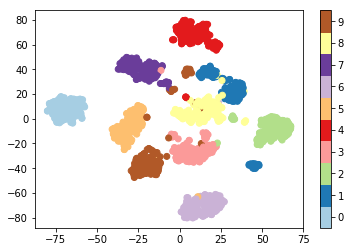

In [108]:
plt.scatter(tsne.embedding_[:,0], tsne.embedding_[:,1], c=Y, cmap='Paired')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

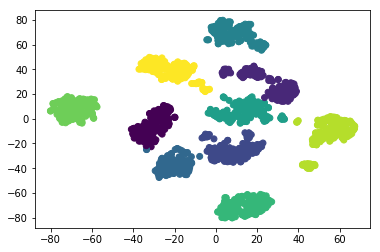

In [109]:
# clusters sobre los resultados de tsne
n_clusters = 10
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(tsne.embedding_)
cluster = k_means.predict(tsne.embedding_)
distance = k_means.transform(tsne.embedding_)

plt.scatter(tsne.embedding_[:,0], tsne.embedding_[:,1], c=cluster)

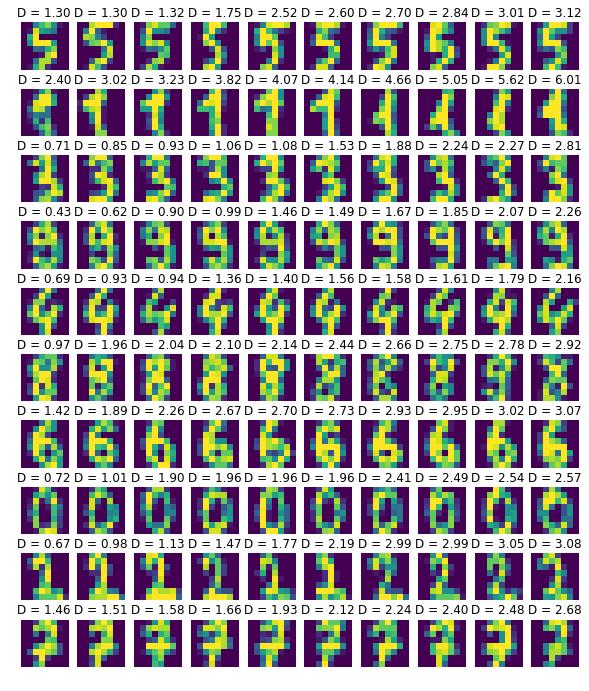

In [110]:
plt.figure(figsize=(10,12))
for i in range(n_clusters):
    jj = (cluster == i)
    distance[~jj,i] = 10000
    ii = np.argsort(distance[:,i])
    n_seq = 10
    for l, ind in enumerate(ii[:n_seq]):
        plt.subplot(n_clusters,n_seq,i*n_seq +l +1)
        plt.imshow(imagenes[ind].reshape(8,8))
        plt.title("D = {:.2f}".format(distance[ind,i]))
        plt.axis('off')


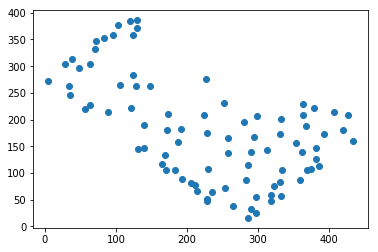

In [64]:
plt.scatter(distance[:,0], distance[:,2])

In [102]:
import umap.plot

ModuleNotFoundError: No module named 'umap.plot'